>Jacob Lustig-Yaeger   

# Continuous spectrum from the solar atmosphere  
We now turn to the formation of the solar continuum radiation, concentrating on the visible and near-
infrared parts of its spectrum.  

## 1. Observed solar continua  

We'll get started by importing some necessary python packages and defining some astrophysical quantities.

In [1]:
# Import some fundamental python packages
%matplotlib inline
import numpy as np; import scipy as sp; import matplotlib as mpl
import matplotlib.pyplot as plt; from matplotlib import gridspec
from matplotlib import rc; from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=25, usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}); mpl.rcParams['font.size'] = 25.0

# Define some physical constants in CGS
h = 6.62607e-27       # Planck constant (erg s)
c = 2.998e10          # Speed of light (cm / s)
k = 1.3807e-16        # Boltzmann constant (erg / K)
mH = 1.67352e-24      # Mass of H (g)
mHe = 3.97 * mH       # Mass of He (g)
Rsun = 6.96e10        # Solar Radius (cm)
Msun = 1.989e33       # Solar Mass (g)
G = 6.67e-8           # Gravitational constant

Table 5 specifies the continuum radiation emitted by the sun between 0.2 - 5 microns, taken from Allen (1976). These data are in the file `solspect.dat`, which looks like:

In [2]:
! head solspect.dat

  0.20  0.02  0.04  0.03  0.04
  0.22  0.07  0.11  0.14  0.20
  0.24  0.09  0.2   0.18  0.30
  0.26  0.19  0.4   0.37  0.5
  0.28  0.35  0.7   0.59  1.19
  0.30  0.76  1.36  1.21  2.15
  0.32  1.10  1.90  1.61  2.83
  0.34  1.33  2.11  1.91  3.01
  0.36  1.46  2.30  2.03  3.20
  0.37  1.57  2.50  2.33  3.62


**Write code to read Table 5.**

In [3]:
solspect = np.genfromtxt('solspect.dat')

# Wavelength (microns):
lam = solspect[:,0]
# Astrophysical flux at the solar surface with spectral irregularities smoothed:
Flam = solspect[:,1] * 1e10
# Astrophysical flux at the solar surface for the continuum between lines:
Flamp = solspect[:,2] * 1e10
# Radially emergent intensity at the solar surface with spectral irregularities smoothed:
Ilam = solspect[:,3] * 1e10
# Radially emergent intensity at the solar surface for the continuum between lines:
Ilamp = solspect[:,4] * 1e10

Plot the four spectral distributions together in one figure. Use a statement to check that the continuum intensity reaches $I_{\lambda}^c = 4.6 \times 10^{10}$ erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ $\mu$m$^{-1}$ at $\lambda = 0.41 \mu$m.

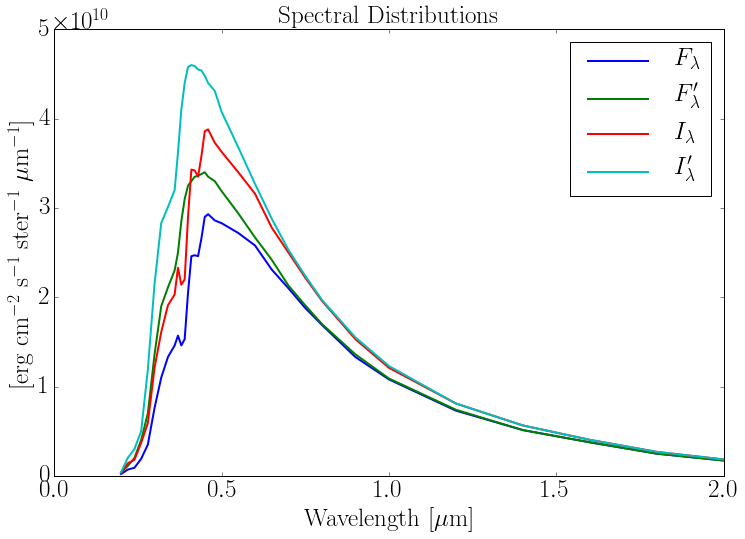

In [4]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Flam, lw=2.0, label=r"$F_{\lambda}$") 
ax0.plot(lam,Flamp, lw=2.0, label=r"$F_{\lambda}'$")      
ax0.plot(lam,Ilam, lw=2.0, label=r"$I_{\lambda}$") 
ax0.plot(lam,Ilamp, lw=2.0, label=r"$I_{\lambda}'$")      
ax0.legend()
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"[erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ $\mu$m$^{-1}$]")
ax0.set_xlim([0,2])
ax0.set_title("Spectral Distributions")
plt.show()

In [5]:
print 'max(F_lam) =', "{:.1e}".format(np.max(Flam)), 'at', lam[np.max(Flam) == Flam][0], 'um'
print 'max(F_lam^c) =', "{:.1e}".format(np.max(Flamp)), 'at', lam[np.max(Flamp) == Flamp][0], 'um'
print 'max(I_lam) =', "{:.1e}".format(np.max(Ilam)), 'at', lam[np.max(Ilam) == Ilam][0], 'um'
print 'max(I_lam^c) =', "{:.1e}".format(np.max(Ilamp)), 'at', lam[np.max(Ilamp) == Ilamp][0], 'um'

max(F_lam) = 2.9e+10 at 0.46 um
max(F_lam^c) = 3.4e+10 at 0.45 um
max(I_lam) = 3.9e+10 at 0.46 um
max(I_lam^c) = 4.6e+10 at 0.41 um


**Explain why the four distributions share the same units and discuss the differences between them.**  

>The four distributions share the same units becasue $F_{\lambda}$, the "astrophysical" flux, is defined as $\pi F_{\lambda} = \mathcal{F_{\lambda}}$ where $\mathcal{F_{\lambda}}$ is the net outward flow of energy through a stellar surface element. This adds a "per steradian" to the units of the astrophysical flux, thus making it the intensity averaged over the stellar disk received by a distant observer.  

**Convert these spectral distributions into values per frequency bandwidth $\Delta \nu = 1$ Hz. Plot these also against wavelength. Check: peak $I_{\nu}^c = 4.21 \times 10^{-5}$ erg cm-2 s-1 ster-1 Hz-1 at $\lambda = 0.80 \mu$m.**  

>From basics we know that  
$$\nu =  \frac{c}{\lambda} \rightarrow d \nu = \frac{-c}{\lambda^2} d \lambda \rightarrow \Delta \nu = \frac{c}{\lambda^2} \Delta \lambda $$  
Thus the conversion factor is: 
$$ \frac{\Delta \lambda}{\Delta \nu} = \frac{\lambda^2}{c}$$  
with c in microns per second, in this case.

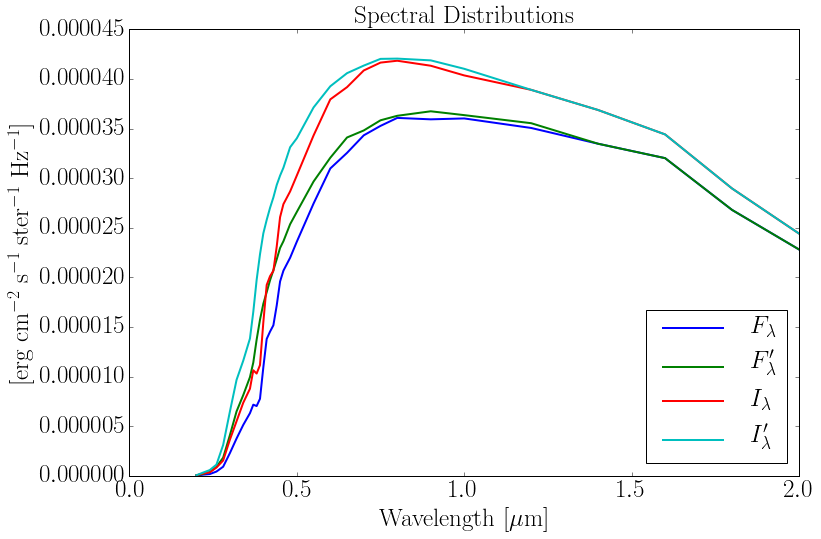

In [6]:
# Conversion factor
dldn = (lam**2.) / (c * 1e4)

# Apply conversion
Fnu = Flam * dldn
Fnup = Flamp * dldn
Inu = Ilam * dldn
Inup = Ilamp * dldn

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Fnu, lw=2.0, label=r"$F_{\lambda}$") 
ax0.plot(lam,Fnup, lw=2.0, label=r"$F_{\lambda}'$")      
ax0.plot(lam,Inu, lw=2.0, label=r"$I_{\lambda}$") 
ax0.plot(lam,Inup, lw=2.0, label=r"$I_{\lambda}'$")      
ax0.legend(loc=4)
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"[erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ Hz$^{-1}$]")
ax0.set_xlim([0,2])
ax0.set_title("Spectral Distributions")
plt.show()

In [7]:
print 'max(I_nu^c) =', "{:.2e}".format(np.max(Inup)), 'at', lam[np.max(Inup) == Inup][0], 'um'

max(I_nu^c) = 4.21e-05 at 0.8 um


**Write a function `planck` (or use your routine from Exercises “Stellar Spectra A: Basic Line Formation”, or use mine) that computes the Planck function in the same units. Try to fit a Planck function to the solar continuum intensity. What rough temperature estimate do you get?**

In [8]:
# Define planck function
def planck(temp, wav):
    # Takes temperature (K), and wavelength (microns)
    wav = wav * 1e-4     # Convert wav into cm
    blambda = (2. * h * c**2) / (wav**5) / (np.exp(h * c / (wav * k * temp)) - 1.0)
    return blambda*1e-4  # Change B_lambda into per micron

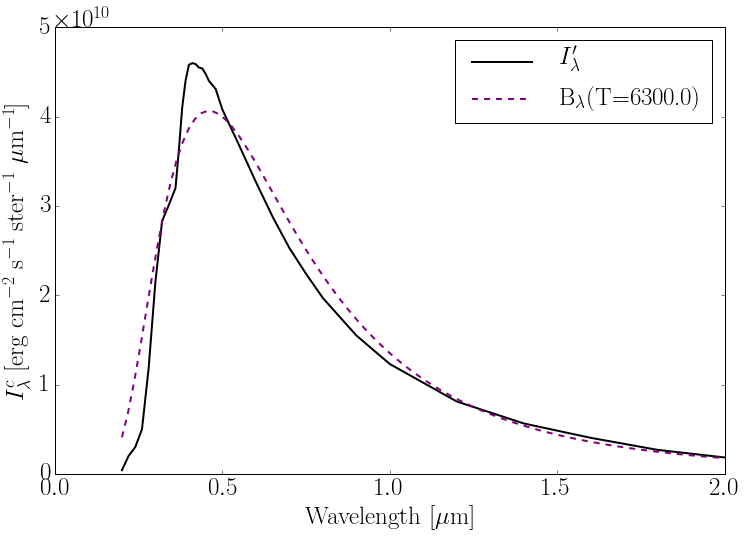

In [9]:
# Define wavelength array
wavelength = np.linspace(0.2,2.0,100)

# Compute planck function
T = 6300.
B = planck(T, wavelength)

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Ilamp, lw=2.0, c='k', label=r"$I_{\lambda}'$")    
ax0.plot(wavelength,B, lw=2.0, c='purple', ls='--', label=r"B$_{\lambda}$(T=%s)" %T)      
ax0.legend()
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"$I_{\lambda}^{c}$  [erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ $\mu$m$^{-1}$]")
ax0.set_xlim([0,2])
plt.show()

**Invert the Planck function analytically to obtain an equation which converts an intensity distribution $I_{\lambda}$ into brightness temperature $T_b$ (defined by $B_{\lambda}(T_b) \equiv I_{\lambda}$).**  

>Typically, we derive the brightness temperature in the Rayleigh-Jeans limit ($h \nu << K T$) where we can take
$$ \exp \left ( \frac{h c}{\lambda k T} \right ) \approx 1 + \frac{h c}{\lambda k T} $$  
so then
$$B_{\lambda} = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp \left ( \frac{h c}{\lambda k T} \right )-1} \approx \frac{2 c k T}{\lambda^4} $$  
Solving for $T$ we get the brightness temperature in terms of wavelength:  
$$ T_b \approx \frac{B_{\lambda} \lambda^4}{2 k c} $$  
However, here it looks like Rutten would like us to just invert the Planck equation to get  
$$ T_b = \frac{hc}{\lambda k \ln \left ( \frac{2 h c^2}{\lambda^5 B_{\lambda}} +  1 \right )} $$

**Code it as a function and use that to plot the brightness temperature of the solar continuum against wavelength. Discuss the shape of this curve. It peaks near 1.6 microns. What does that mean for the radiation escape at this wavelength?**

In [10]:
def brighttemp(wav,intensity):
    wavcm = wav * 1e-4        # change wav into cm
    intcm = intensity * 1e4   # change into per cm bandwidth
    tempbright = h*c / (wavcm*k) / np.log(2.*h*c**2./(intcm*wavcm**5)+1.0)

    return tempbright

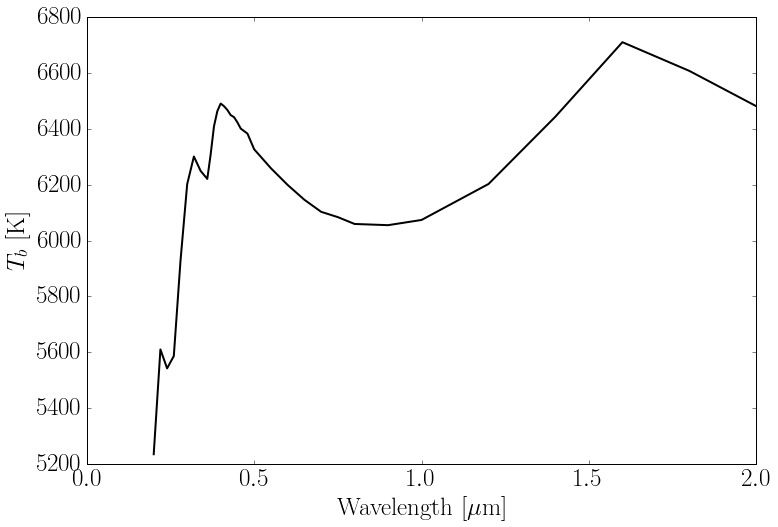

In [11]:
# Calculate Brightness Temperatures for the solar continuum
B_T = brighttemp(lam, Ilamp)

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,B_T, lw=2.0, c='k')    
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"$T_b$ [K]")
ax0.set_xlim([0,2])
plt.show()

>The Brightness Temperature curve has two peaks: one local peak (6500 K) at around 0.75 microns and a global maximum (6700 K) around 1.6 microns. Between the two peaks is a local minimum (6000 K) at around 0.9 microns. The radiation escaping at the wavelength of peak brightness temperature around 1.6 microns is coming from a hotter, deeper region in the stellar atmosphere. The stellar atmosphere is likely optically thin at this wavelength. 

## 2. Continuous extinction  
**Pull exthmin.pro over and compare it to Gray's formulation.** 
>What does Rutten mean here? Below I've 

In [77]:
def exthmin(wav,temp,eldens, check=False):
    # physics constants in cgs (all cm)
    kcgs=k    # Boltzmann constant (erg/K; double precision)
    hcgs=h    # Planck constant (erg s)
    ccgs=c    # velocity of light (cm/s)

    # other parameters
    #wav=float(wav)
    theta=5040./temp
    elpress=eldens*kcgs*temp

    # evaluate H-min bound-free per H-min ion = Gray (8.11)
    # his alpha = my sigma in NGSB/AFYC (per particle without stimulated)
    sigmabf = 1.99654 -1.18267E-5*wav +2.64243E-6*wav**2 -4.40524E-10*wav**3 \
            +3.23992E-14*wav**4 -1.39568E-18*wav**5 +2.78701E-23*wav**6
    sigmabf=sigmabf*1e-18  # cm^2 per H-min ion
    if np.sum((wav > 16444)): 
        try:
            sigmabf[wav > 16444] = 0.  
        except TypeError:
            sigmabf = 0
    # H-min ionization limit 
    # This Krijger trick to permit array input

    # convert into bound-free per neutral H atom assuming Saha = Gray p135
    # units: cm2 per neutral H atom in whatever level (whole stage)
    graysaha=4.158e-10*elpress*theta**2.5*10.**(0.754*theta) # Gray (8.12)
    kappabf=sigmabf*graysaha                                 # per neutral H atom
    kappabf=kappabf*(1.-np.exp(-hcgs*ccgs/(wav*1e-8*kcgs*temp))) 
    # correct stimulated emission

    # check Gray's Saha-Boltzmann with AFYC (edition 1999) p168
    if check:
        logratio=-0.1761-np.log10(elpress)+np.log10(2.)+2.5*np.log10(temp)-theta*0.754
        print'Hmin/H ratio=',1/(10.**logratio) # OK, same as Gray factor SB

    # evaluate H-min free-free including stimulated emission = Gray p136
    lwav=np.log10(wav)
    f0 =  -2.2763 -1.6850*lwav +0.76661*lwav**2 -0.0533464*lwav**3
    f1 =  15.2827 -9.2846*lwav +1.99381*lwav**2 -0.142631*lwav**3
    f2 = -197.789 +190.266*lwav -67.9775*lwav**2 +10.6913*lwav**3 -0.625151*lwav**4
    ltheta=np.log10(theta)
    kappaff = 1e-26*elpress*10**(f0+f1*ltheta+f2*ltheta**2)   # Gray (8.13)

    return kappabf+kappaff

**Plot the wavelength variation of the H- extinction for the FALC parameters at h = 0 km (see Tables 3-
4). This plot reproduces the result of Chandrasekhar & Breen (1946). Compare it to Gray's version in Figure 5.**  
>We'll read-in the `falc.dat` file from the last lab for the electron density

In [13]:
! head falc.dat

FALC solar model atmosphere of Fontenla, Avrett & Loeser 1993ApJ...406..319F; 82 heights top-to-bottom
 height   tau_500    colmass    temp    v_turb n_Htotal   n_proton   n_electron pressure  p_gas/p  density
 [km]     dimless    [g/cm^2]   [K]     [km/s] [cm^-3]    [cm^-3]    [cm^-3]    [dyn/cm2] ratio    [g/cm^3]
 
 2218.20  0.000E+00  6.777E-06  100000  11.73  5.575E+09  5.575E+09  6.665E+09  1.857E-01  0.952  1.306E-14
 2216.50  7.696E-10  6.779E-06   95600  11.65  5.838E+09  5.837E+09  6.947E+09  1.857E-01  0.950  1.368E-14
 2214.89  1.531E-09  6.781E-06   90816  11.56  6.151E+09  6.150E+09  7.284E+09  1.858E-01  0.948  1.441E-14
 2212.77  2.597E-09  6.785E-06   83891  11.42  6.668E+09  6.667E+09  7.834E+09  1.859E-01  0.945  1.562E-14
 2210.64  3.754E-09  6.788E-06   75934  11.25  7.381E+09  7.378E+09  8.576E+09  1.860E-01  0.941  1.729E-14
 2209.57  4.384E-09  6.790E-06   71336  11.14  7.864E+09  7.858E+09  9.076E+09  1.860E-01  0.938  1.843E-14


In [14]:
# Read-in FALC model
falc = np.genfromtxt('falc.dat', skip_header=4)
height = falc[:,0]
tau500 = falc[:,1]
colm = falc[:,2]
temp = falc[:,3]
vturb = falc[:,4]
nhyd = falc[:,5]
nprot = falc[:,6]
nel = falc[:,7]
ptot = falc[:,8]
pgasptot = falc[:,9]
dens = falc[:,10]

In [15]:
print 'temperature =', temp[-11], 'K  at  h =', height[-11]

temperature = 6520.0 K  at  h = 0.0


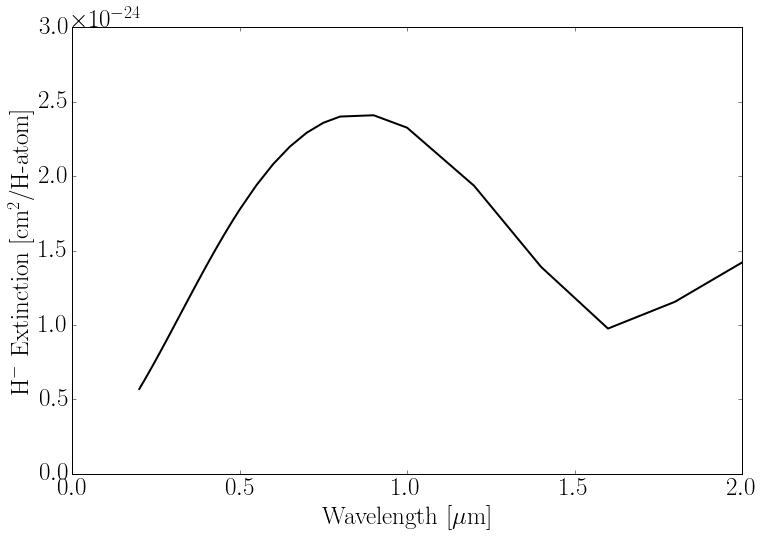

In [78]:
# Calculate H- extinction
Hmin = exthmin(lam*1e4, temp[-11], nel[-11])

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,Hmin, lw=2.0, c='k')    
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"H$^{-}$ Extinction [cm$^2$/H-atom]")
ax0.set_xlim([0,2])
ax0.set_ylim([0,0.3e-23])
plt.show()

>The above plot matches the sum of the H$^{-}_{bf}$ and H$^{-}_{ff}$ curves in figure 5 of Rutten, which makes sense because that is exactly what our `exthmin()` function computes.   

**Hydrogenic bound-free edges behave just as HI with maximum extinction at the ionization limit and decay $\sim \lambda^3$ for smaller wavelengths, as indeed shown by the HI curve in Figure 5. The H− bound-free extinction differs strongly from this pattern. Why is it not hydrogenic although due to hydrogen?**  

>*Hydrogenic atoms* are any atomic nuclei with one electron. Since the H- ion has two electrons it is not hydrogenic, and therefore differs from the HI curve.   

**How should you plot this variation to make it look like the solar brightness temperature variation with wavelength? Why?**  

>Answer

**Read in the FALC model atmosphere (see the previous exercise). Note that column nH in the FALC model of Tables 3-4 is the total hydrogen density, summing neutral atoms and free protons (and H2 molecules but those are virtually absent). This is seen by inspecting the values of nH and np at the top of the FALC table where all hydrogen is ionised. Gray's H- extinction is measured per neutral hydrogen atom, so you have to multiply the height-dependent result from `exthmin(wav,temp,eldens)` with neutral $H \sim n_H(h) − n_p(h)$ to obtain extinction $\alpha_{\lambda}(H- )$ measured per cm path length (or cross-section per cubic cm) at every height h. Plot the variation of the H− extinction per cm with height for $ \lambda = 0.5$ microns. This plot needs to be logarithmic in y, why?**

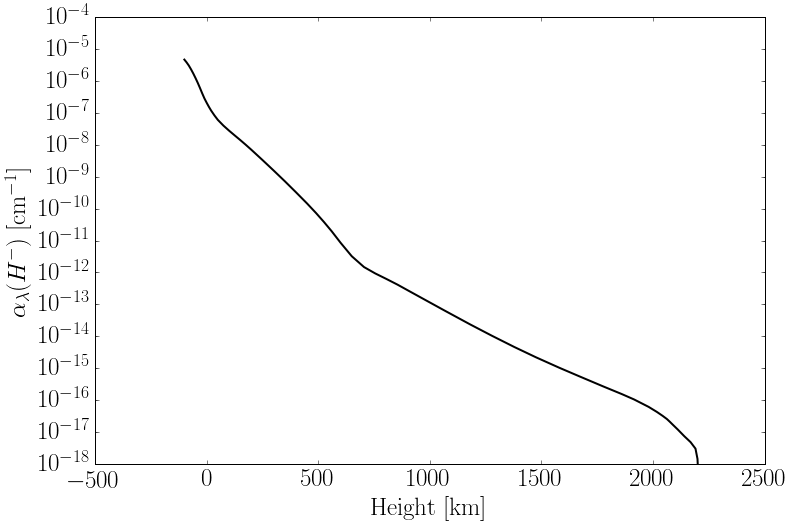

In [79]:
# Calculate H- extinction
Hmin = exthmin(0.5*1e4, temp, nel)

# Calculate neutral H
n_neutral = nhyd - nprot

# Calculate Gray's extrinction
alpha_hmin = n_neutral * Hmin

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,alpha_hmin, lw=2.0, c='k')    
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"$\alpha_{\lambda}(H^{-})$ [cm$^{-1}$]")
ax0.set_xlim([-500,2500])
ax0.set_ylim([1e-18,1e-4])
ax0.semilogy()
plt.show()

>The above plot needs to be logarithmic because the variation spans 13 orders of magnitude.   

**Now add the Thomson scattering off free electrons to the extinction per cm. The Thomson crosssection per electron is the same at all wavelengths and is given by  
$$ \sigma^T = 6.648 \times 10^{-25} \text{ cm}^2$$   
With which height-dependent quantity do you have to multiply this number to obtain extinction per cm? Overplot this contribution to the continuous extinction $\alpha^c_{\lambda}(h)$ in your graph and then overplot the total continuous extinction too. Explain the result.**  

>The Thomson scattering cross-section $\sigma^T$ has units cm$^2$/electron. Multiplying the electron number density  
$$ \sigma^T \times n_e = \alpha^{T}(h) \text{  cm}^{-1}$$  
gives the Thomson scattering extinction per cm.

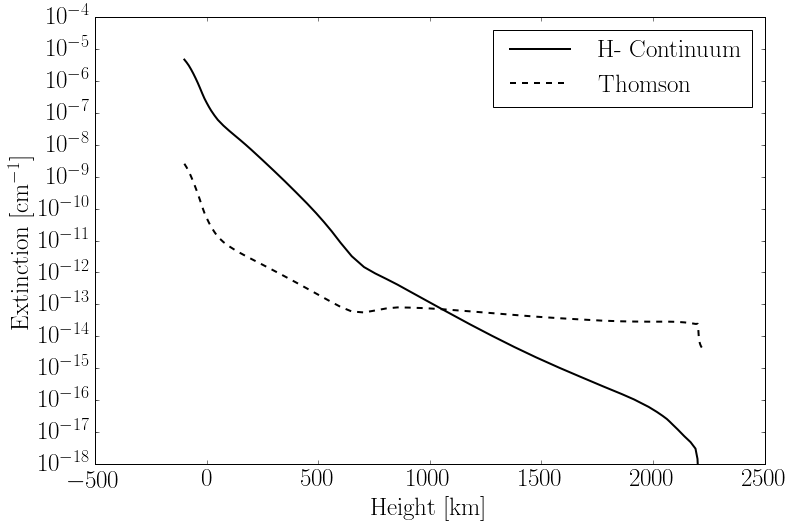

In [18]:
# Define Thomson scattering xsect
sigmaT = 6.648e-25

# Calculate Thomson scattering extinction per cm
alphaT = sigmaT * nel

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,alpha_hmin, lw=2.0, c='k', label='H- Continuum')    
ax0.plot(height,alphaT, lw=2.0, c='k', label='Thomson', ls='--')    
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Extinction [cm$^{-1}$]")
ax0.set_xlim([-500,2500])
ax0.set_ylim([1e-18,1e-4])
ax0.semilogy(); ax0.legend()
plt.show()

## 2.3 Optical depth  

$$\tau_{\lambda}(h_0) \equiv \int_{\infty}^{h_0} \alpha^c_{\lambda} dh $$  

**Integrate the extinction at $\lambda = 500$ nm to obtain the $\tau_{500}$ scale and compare it graphically to the FALC $\tau_{500}$ scale. Here is my code, with ext(ih) denoting the continuous extinction per cm at $\lambda = 500$ nm and at height h(ih):**

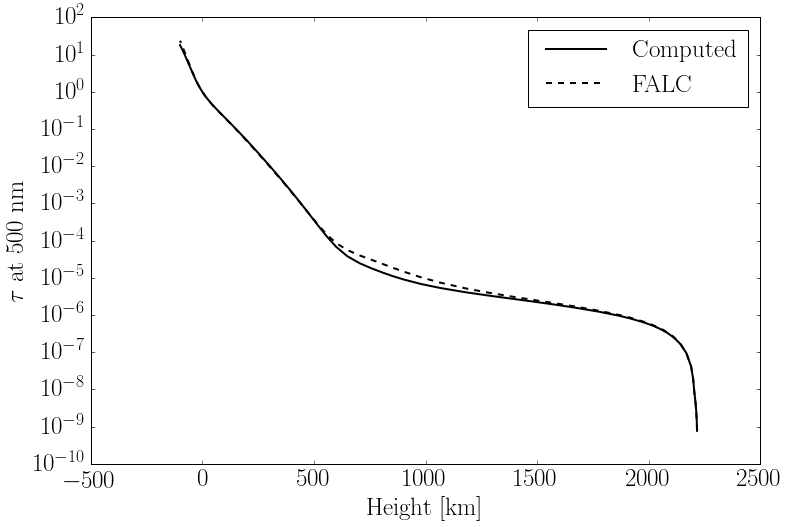

In [19]:
# Define total extinction
ext = alpha_hmin + alphaT

# Compute and plot tau at 500 nm, compare with FALC tau5
tau=np.zeros_like(nhyd)
for ih in range(1,len(nhyd)):  
    tau[ih] = tau[ih-1] + 0.5*(ext[ih]+ext[ih-1]) * (height[ih-1]-height[ih])*1e5

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,tau, lw=2.0, c='k', label='Computed')    
ax0.plot(height,tau500, lw=2.0, c='k', label='FALC', ls='--')    
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"$\tau$ at 500 nm")
ax0.semilogy(); ax0.legend()
plt.show()

## 2.4 Emergent intensity and height of formation  

**Copy `emergint.pro` into your IDL program and make it work setting wl=0.5.** 

>AKA write in python...

In [20]:
def emergent(wl):
    # Emergent intensity at wavelength wl (micron)
    ext=np.zeros_like(nhyd)
    tau=np.zeros_like(nhyd)
    integrand=np.zeros_like(nhyd)
    contfunc=np.zeros_like(nhyd)
    intg=0.
    hint=0.
    for ih in range(1,len(nhyd)): 
        ext[ih]=exthmin(wl*1e4,temp[ih],nel[ih])*(nhyd[ih]-nprot[ih])+0.664E-24*nel[ih]
        tau[ih]=tau[ih-1]+0.5*(ext[ih]+ext[ih-1])*(height[ih-1]-height[ih])*1e5
        integrand[ih]=planck(temp[ih],wl)*np.exp(-tau[ih])
        intg=intg+0.5*(integrand[ih]+integrand[ih-1])*(tau[ih]-tau[ih-1])
        hint=hint+height[ih]*0.5*(integrand[ih]+integrand[ih-1])*(tau[ih]-tau[ih-1])
        contfunc[ih]=integrand[ih]*ext[ih]
    hmean=hint/intg
    return intg, contfunc, hmean, tau

In [21]:
# set wavelength
wl = 0.5

# Calculate emergent Intensity
intg1, contfunc1, hmean1, tau1 = emergent(wl)

**Compare the computed intensity at $\lambda = 500$ nm with the observed intensity**

In [22]:
print 'calculated cont int = '+"{:.2e}".format(intg1)
print 'observed cont int = '+"{:.2e}".format(Ilamp[wl == lam][0])

calculated cont int = 4.29e+10
observed cont int = 4.08e+10


**Plot the peak-normalized contribution function against height and compare its peak location with the mean height of formation.**  

**Repeat the above for $\lambda = 1, 1.6, 5$ microns.**

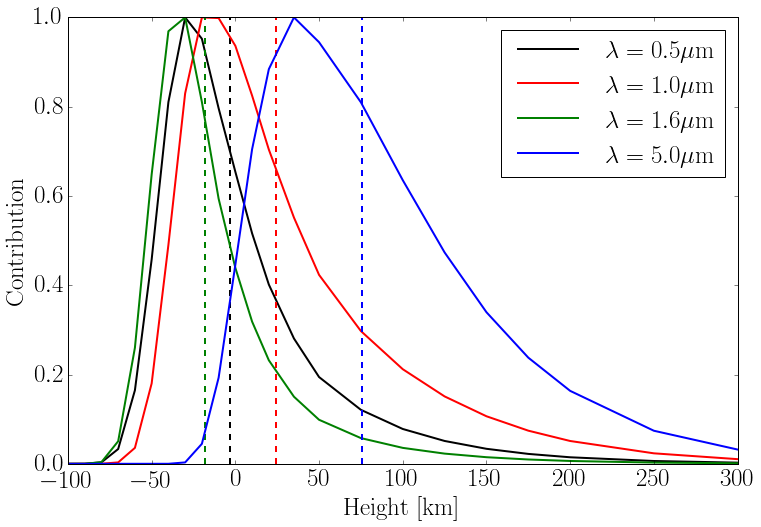

In [23]:
# Calculate for additional wavelengths
intg2, contfunc2, hmean2, tau2 = emergent(1.0)
intg3, contfunc3, hmean3, tau3 = emergent(1.6)
intg4, contfunc4, hmean4, tau4 = emergent(5.0)

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(height,contfunc1/np.max(contfunc1), lw=2.0, c='k', label='$\lambda = 0.5 \mu$m')  
ax0.axvline(hmean1, ls='--', c='k', lw=2.0)
ax0.plot(height,contfunc2/np.max(contfunc2), lw=2.0, c='r', label='$\lambda = 1.0 \mu$m')  
ax0.axvline(hmean2, ls='--', c='r', lw=2.0)
ax0.plot(height,contfunc3/np.max(contfunc3), lw=2.0, c='g', label='$\lambda = 1.6 \mu$m')  
ax0.axvline(hmean3, ls='--', c='g', lw=2.0)
ax0.plot(height,contfunc4/np.max(contfunc4), lw=2.0, c='b', label='$\lambda = 5.0 \mu$m')  
ax0.axvline(hmean4, ls='--', c='b', lw=2.0)
#ax0.plot(height,tau500, lw=2.0, c='k', label='FALC', ls='--')    
ax0.set_xlabel(r"Height [km]")
ax0.set_ylabel(r"Contribution")
ax0.set_xlim([-100,300])
#ax0.semilogy()#; 
ax0.legend()
plt.show()

**Discuss the changes of the contribution functions and their cause.**  

>The contribution function peaks at different heights for different wavelengths. The 5 micron contribution function peaks the highest up in the Sun, likely because the atmosphere is cooler higher up and the planck function peaks in the mid-IR at this height. While the 500 nm contribution function peaks down near the solar surface where it is hotter than higher levels. Additionally, there is a trend where wavelengths that peak higher up in the solar atmosphere have broader contribution functions. This is probably because the photons at these wavelengths face lower optical depths due to H- extinction on their way out of the atmosphere. For instance, if we look at the H- extinction curve above we see a local minimum in H- extinction near 1.6 mircons, and sure enough the contribution at 1.6 microns peaks even lower than the 0.5 micron contribution function. This helps validate the conclusion that the opacity due to H- extinction is dictating the atmosphereic height at which the continuum intensity is formed.   

**Check the validity of the LTE Eddington-Barbier approximation $I_{\lambda} \approx B_{\lambda}(T[\tau_{\lambda} =1])$ by comparing the mean heights of formation with the $\tau_{\lambda} = 1$ locations and with the locations where $T_b = T(h)$.**  

>We'll need a function to find the nearest value in the temperature array to the brightness temperature:

In [24]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

In [25]:
i1 = find_nearest(temp, brighttemp(0.5,intg1))
i2 = find_nearest(temp, brighttemp(1.0,intg2))
i3 = find_nearest(temp, brighttemp(1.6,intg3))
i4 = find_nearest(temp, brighttemp(5.0,intg4))

j1 = find_nearest(tau1, 1.0)
j2 = find_nearest(tau2, 1.0)
j3 = find_nearest(tau3, 1.0)
j4 = find_nearest(tau4, 1.0)

print 'wl = 0.5 um:  meanH:', hmean1, 'km ; tau=1 at ',  height[j1], 'km ; Tb=Th:', height[i1], 'km'
print 'wl = 1.0 um:  meanH:', hmean2, 'km ; tau=1 at ',  height[j2], 'km ; Tb=Th:', height[i2], 'km'
print 'wl = 1.6 um:  meanH:', hmean3, 'km ; tau=1 at ',  height[j3], 'km ; Tb=Th:', height[i3], 'km'
print 'wl = 5.0 um:  meanH:', hmean4, 'km ; tau=1 at ',  height[j4], 'km ; Tb=Th:', height[i4], 'km'

wl = 0.5 um:  meanH: -3.13801319179 km ; tau=1 at  0.0 km ; Tb=Th: 1278.0 km
wl = 1.0 um:  meanH: 24.1109914031 km ; tau=1 at  10.0 km ; Tb=Th: 20.0 km
wl = 1.6 um:  meanH: -17.9428432526 km ; tau=1 at  -30.0 km ; Tb=Th: 1580.0 km
wl = 5.0 um:  meanH: 75.9275916217 km ; tau=1 at  50.0 km ; Tb=Th: 855.0 km


>There seems to be the best agreement between the three different heights at 1.0 microns.  

## 2.5 Disk-center intensity  

**Compute the emergent continuum over the wavelength range of Table 5.**  

>The solar disk-center intensity spectrum can now be computed by repeating the above in a big loop over wavelength.

In [26]:
# Create array to store emergent continuum intensity
intarr = np.zeros_like(lam)

# Loop over all wavelenghts 
for iwl in range(len(lam)):
    
    # Calculate emergent Intensity
    intarr[iwl], contfunc_tmp, hmean_tmp, tau_tmp = emergent(lam[iwl])

**Compare it graphically with the observed solar continuum in Table 5 and file `solspect.dat`.**

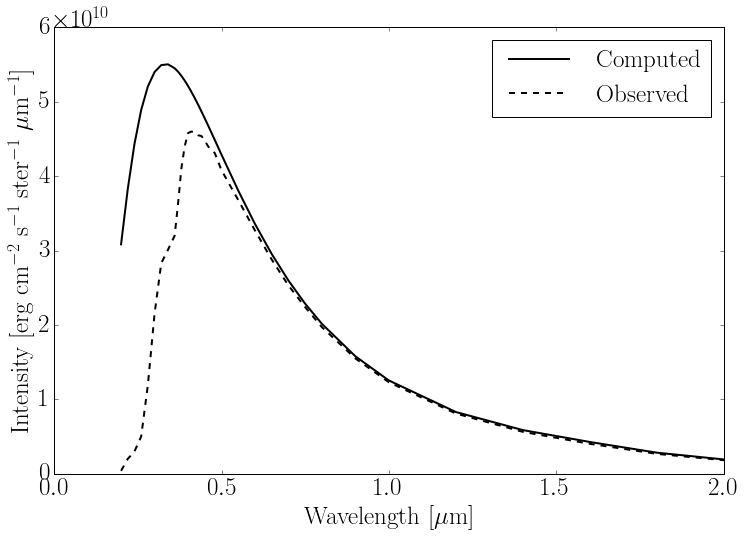

In [27]:
# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
ax0.plot(lam,intarr, lw=2.0, c='k', label='Computed')    
ax0.plot(lam,Ilamp, lw=2.0, c='k', label='Observed', ls='--')    
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"Intensity [erg cm$^{-2}$ s$^{-1}$ ster$^{-1}$ $\mu$m$^{-1}$]")
ax0.set_xlim([0,2.0])
#ax0.semilogy(); 
ax0.legend()
plt.show()

## 2.6 Limb darkening  

The code is easily modified to give the intensity that emerges under an angle $\mu = \cos \theta$, in plane-parallel
approximation given by:  

$$ I_{\lambda}(0,\mu) = \int_0^{\infty} S_{\lambda} e^{-\tau / \mu} d\tau_{\lambda}/\mu $$  

**Repeat the intensity evaluation using the plane-parallel approximation with in an outer loop over $\mu=0.1,0.2,...,1.0$.**  

>First we'll define a new function `emergentpp(wl, mu)` to calculate the emergent continuum intensity in the plane-parallel approximation:

In [28]:
def emergentpp(wl, mu):
    # Emergent intensity at wavelength wl (micron), cos(theta) mu 
    ext=np.zeros_like(nhyd)
    tau=np.zeros_like(nhyd)
    integrand=np.zeros_like(nhyd)
    contfunc=np.zeros_like(nhyd)
    intg=0.
    hint=0.
    for ih in range(1,len(nhyd)): 
        ext[ih]=exthmin(wl*1e4,temp[ih],nel[ih])*(nhyd[ih]-nprot[ih])+0.664E-24*nel[ih]
        tau[ih]=tau[ih-1]+0.5*(ext[ih]+ext[ih-1])*(height[ih-1]-height[ih])*1e5
        integrand[ih]=planck(temp[ih],wl)*np.exp(-tau[ih]/mu)
        intg=intg+0.5*(integrand[ih]+integrand[ih-1])*(tau[ih]-tau[ih-1])/mu
        hint=hint+height[ih]*0.5*(integrand[ih]+integrand[ih-1])*(tau[ih]-tau[ih-1])
        contfunc[ih]=integrand[ih]*ext[ih]
    hmean=hint/intg
    return intg, contfunc, hmean, tau

>Now we'll repeat the intensity calculation:

In [37]:
# Define mu grid
muarr = np.arange(0.1,1.1,0.1)

# Define new intensity grid
Imuarr = np.zeros([len(lam), len(muarr)])

for imu in range(len(muarr)):
    for iwl in range(len(lam)):
        # Calculate emergent Intensity
        Imuarr[iwl, imu], contfunc_tmp, hmean_tmp, tau_tmp = emergentpp(lam[iwl], muarr[imu])

**Plot the computed ratio $I_{\lambda}(0, \mu)/I_{\lambda}(0, 1)$ at a few selected wavelengths, against $\mu$ and also against the radius of the apparent solar disk $r/R_{\odot} = \sin \theta$.**

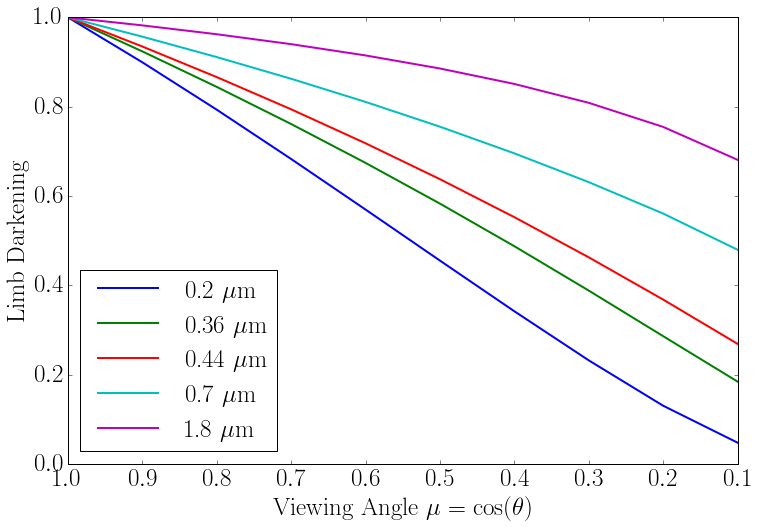

In [59]:
# Calculate limb darkening
limbdark = np.zeros_like(Imuarr)
for imu in range(len(muarr)):
    limbdark[:,imu] = Imuarr[:,imu] / Imuarr[:,-1]

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
for iwl in range(len(lam))[::8]:
    ax0.plot(muarr,limbdark[iwl,:], lw=2.0, label=str(lam[iwl])+r' $\mu$m')    
ax0.set_xlabel(r"Viewing Angle $\mu = \cos(\theta)$")
ax0.set_ylabel(r"Limb Darkening")
ax0.legend(loc=3)
ax0.invert_xaxis()
plt.show()

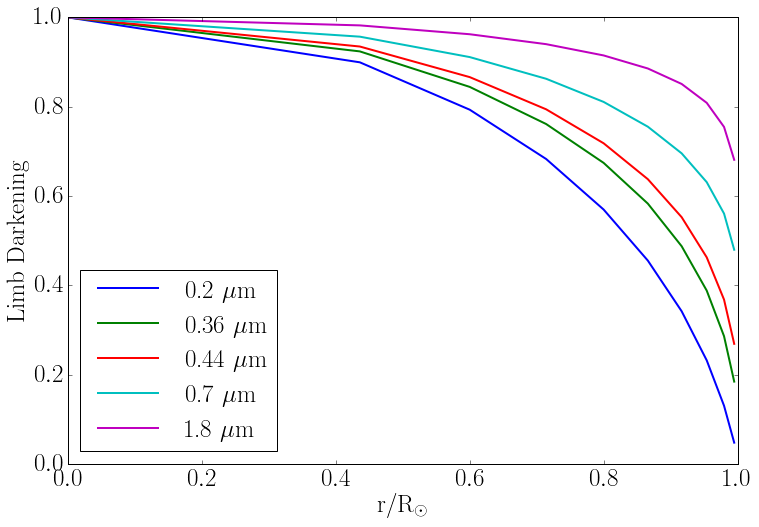

In [64]:
# Calculate sin(theta)
sintheta = np.sin(np.arccos(muarr))

# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
for iwl in range(len(lam))[::8]:
    ax0.plot(sintheta,limbdark[iwl,:], lw=2.0, label=str(lam[iwl])+r' $\mu$m')    
ax0.set_xlabel(r"r/R$_{\odot}$")
ax0.set_ylabel(r"Limb Darkening")
ax0.legend(loc=3)
plt.show()

**Explain the limb darkening and its variation with wavelength.**  

>Emergent rays normal to the solar surface face little to no limb darkening-- essentialy all the radiation emerges. Rays emitted close to tangent to the solar surface (i.e. from the limb) experience a substantial decrease in the emergent flux. Furthermore, shorter wavelengths are darkened more substantially because, as we have seen, these short wavelengths tend to be emitted from deeper in the atmosphere, and therefore face longer pathlengths to escape, which means higher optical depths due to H- extinction, and thus more limb darkening.  

## 2.7 Flux integration  

**Compute the emergent solar flux and compare it to the observed flux in Table 5 and file `solspect.dat`.** 

In [106]:
# ===== three-point Gaussian integration intensity -> flux
# abscissae + weights n=3 Abramowitz & Stegun page 916
xgauss=np.array([-0.7745966692,0.0000000000,0.7745966692])
wgauss=np.array([ 0.5555555555,0.8888888888,0.5555555555])
fluxspec=np.zeros(len(lam))
intmu=np.zeros([3,len(lam)])
for imu in range(3):
    mu=0.5+xgauss[imu]/2.   # rescale xrange [-1,+1] to [0,1]
    wg=wgauss[imu]/2.       # weights add up to 2 on [-1,+1]
    for iw in range(0,len(lam)):
        wl=lam[iw]
        #@emergintmu.pro       # old trapezoidal integration I(0,mu)
        intmu[imu,iw], contfunc_tmp, hmean_tmp, tau_tmp = emergentpp(lam[iw], mu)
        fluxspec[iw]=fluxspec[iw]+wg*intmu[imu,iw]*mu
fluxspec=2.*fluxspec   # no !pi, AQ has flux F, not {\cal F}

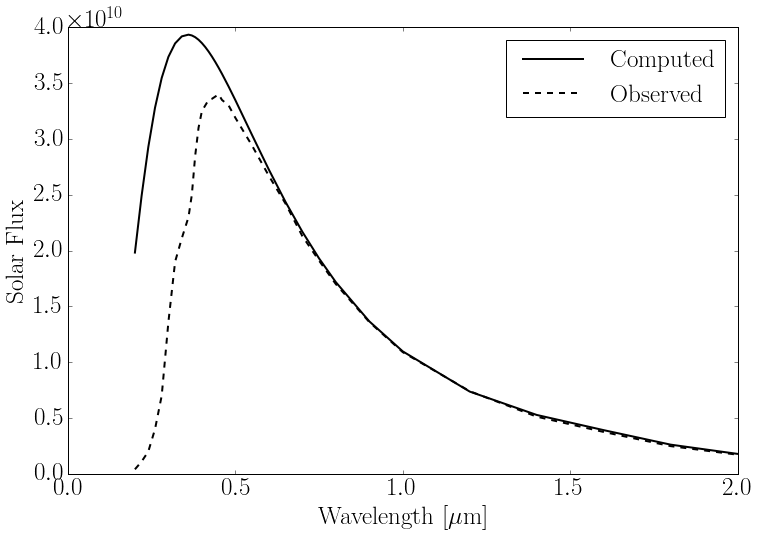

In [107]:
# Plot
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])
#for iwl in range(len(lam))[::8]:
#    ax0.plot(sintheta,limbdark[iwl,:], lw=2.0, label=str(lam[iwl])+r' $\mu$m')    
ax0.plot(lam, fluxspec, lw=2.0, label='Computed', c='k')
ax0.plot(lam, Flamp, lw=2.0, ls='--', label='Observed', c='k')
ax0.set_xlabel(r"Wavelength [$\mu$m]")
ax0.set_ylabel(r"Solar Flux")
ax0.legend(loc=0)
ax0.set_xlim([0,2.0])
plt.show()